In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [ ]:
!pip install catboost
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Meta_Data_CSV = pd.read_csv("/content/drive/MyDrive/UrbanSound8K.csv")

In [ ]:
print(Meta_Data_CSV.head(-1))

         slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8726     99812-1-1-0.wav   99812   89.207778   93.207778         2     7   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   

      classID             class  
0           3          dog_bark  
1           2  chil

In [ ]:
print(Meta_Data_CSV["class"].value_counts())

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


In [ ]:
print(Meta_Data_CSV.isnull().sum())

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64


In [ ]:
File_Name_Array = np.array(Meta_Data_CSV["slice_file_name"])
Fold_Array = np.array(Meta_Data_CSV["fold"])
Class_Array = np.array(Meta_Data_CSV["class"])

In [ ]:
print(File_Name_Array)

['100032-3-0-0.wav' '100263-2-0-117.wav' '100263-2-0-121.wav' ...
 '99812-1-4-0.wav' '99812-1-5-0.wav' '99812-1-6-0.wav']


In [ ]:
print(Fold_Array)

[5 5 5 ... 7 7 7]


In [ ]:
print(Class_Array)

['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [ ]:
Path_Wav_List = []
Category_List = []

for path_number in range(8732):
    File_Path_Name = "/content/" +  Meta_Data_CSV["slice_file_name"][path_number]
    Path_Wav_List.append(File_Path_Name)
    Category_List.append(Meta_Data_CSV["class"][path_number])

['/content/drive/MyDrive/Colab Notebooks/fold5/100032-3-0-0.wav', '/content/drive/MyDrive/Colab Notebooks/fold5/100263-2-0-117.wav', '/content/drive/MyDrive/Colab Notebooks/fold5/100263-2-0-121.wav', '/content/drive/MyDrive/Colab Notebooks/fold5/100263-2-0-126.wav', '/content/drive/MyDrive/Colab Notebooks/fold5/100263-2-0-137.wav']


In [ ]:
!unzip '/content/drive/MyDrive/fold10.zip'

Archive:  /content/drive/MyDrive/fold10.zip
  inflating: 100648-1-0-0.wav        
  inflating: 100648-1-1-0.wav        
  inflating: 100648-1-2-0.wav        
  inflating: 100648-1-3-0.wav        
  inflating: 100648-1-4-0.wav        
  inflating: 100795-3-0-0.wav        
  inflating: 100795-3-1-0.wav        
  inflating: 100795-3-1-1.wav        
  inflating: 100795-3-1-2.wav        
  inflating: 101382-2-0-10.wav       
  inflating: 101382-2-0-12.wav       
  inflating: 101382-2-0-20.wav       
  inflating: 101382-2-0-21.wav       
  inflating: 101382-2-0-29.wav       
  inflating: 101382-2-0-33.wav       
  inflating: 101382-2-0-42.wav       
  inflating: 101382-2-0-45.wav       
  inflating: 102103-3-0-0.wav        
  inflating: 102103-3-1-0.wav        
  inflating: 102857-5-0-0.wav        
  inflating: 102857-5-0-1.wav        
  inflating: 102857-5-0-10.wav       
  inflating: 102857-5-0-11.wav       
  inflating: 102857-5-0-12.wav       
  inflating: 102857-5-0-13.wav       
  infl

In [ ]:
print(Path_Wav_List[0:5])

['/content/100032-3-0-0.wav', '/content/100263-2-0-117.wav', '/content/100263-2-0-121.wav', '/content/100263-2-0-126.wav', '/content/100263-2-0-137.wav']


In [ ]:
print(Category_List[0:5])

['dog_bark', 'children_playing', 'children_playing', 'children_playing', 'children_playing']


In [ ]:
Path_Wav_Series = pd.Series(Path_Wav_List,name="WAV").astype(str)
Category_Series = pd.Series(Category_List,name="CATEGORY")

In [ ]:
print(Path_Wav_Series)

0         /content/100032-3-0-0.wav
1       /content/100263-2-0-117.wav
2       /content/100263-2-0-121.wav
3       /content/100263-2-0-126.wav
4       /content/100263-2-0-137.wav
                   ...             
8727       /content/99812-1-2-0.wav
8728       /content/99812-1-3-0.wav
8729       /content/99812-1-4-0.wav
8730       /content/99812-1-5-0.wav
8731       /content/99812-1-6-0.wav
Name: WAV, Length: 8732, dtype: object


In [ ]:
print(Category_Series)

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: CATEGORY, Length: 8732, dtype: object


In [ ]:
Main_Train_Data = pd.concat([Path_Wav_Series,Category_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                              WAV          CATEGORY
0       /content/100032-3-0-0.wav          dog_bark
1     /content/100263-2-0-117.wav  children_playing
2     /content/100263-2-0-121.wav  children_playing
3     /content/100263-2-0-126.wav  children_playing
4     /content/100263-2-0-137.wav  children_playing
...                           ...               ...
8726     /content/99812-1-1-0.wav          car_horn
8727     /content/99812-1-2-0.wav          car_horn
8728     /content/99812-1-3-0.wav          car_horn
8729     /content/99812-1-4-0.wav          car_horn
8730     /content/99812-1-5-0.wav          car_horn

[8731 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np

# Assuming "Main_Train_Data" is your DataFrame
# Set the random seed for reproducibility
random_seed = 42

# Define the desired number of occurrences for each category
desired_occurrences = 1300

# Calculate the current number of occurrences for each category
current_occurrences = Main_Train_Data["CATEGORY"].value_counts()

# Calculate the scaling factor for each category
scaling_factors = desired_occurrences / current_occurrences

# Replace occurrences of "siren", "car_horn", and "gun_shot" with the desired number of occurrences
siren_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "siren"].sample(n=int(current_occurrences["siren"] * scaling_factors["siren"]), replace=True, random_state=random_seed)
car_horn_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "car_horn"].sample(n=int(current_occurrences["car_horn"] * scaling_factors["car_horn"]), replace=True, random_state=random_seed)
gun_shot_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "gun_shot"].sample(n=int(current_occurrences["gun_shot"] * scaling_factors["gun_shot"]), replace=True, random_state=random_seed)
drilling_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "drilling"].sample(n=int(current_occurrences["drilling"] * scaling_factors["drilling"]), replace=True, random_state=random_seed)
jackhammer_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "jackhammer"].sample(n=int(current_occurrences["jackhammer"] * scaling_factors["jackhammer"]), replace=True, random_state=random_seed)
street_music_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "street_music"].sample(n=int(current_occurrences["street_music"] * scaling_factors["street_music"]), replace=True, random_state=random_seed)
engine_idling_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "engine_idling"].sample(n=int(current_occurrences["engine_idling"] * scaling_factors["engine_idling"]), replace=True, random_state=random_seed)
air_conditioner_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "air_conditioner"].sample(n=int(current_occurrences["air_conditioner"] * scaling_factors["air_conditioner"]), replace=True, random_state=random_seed)
dog_bark_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "dog_bark"].sample(n=int(current_occurrences["dog_bark"] * scaling_factors["dog_bark"]), replace=True, random_state=random_seed)
children_playing_rows = Main_Train_Data[Main_Train_Data["CATEGORY"] == "children_playing"].sample(n=int(current_occurrences["children_playing"] * scaling_factors["children_playing"]), replace=True, random_state=random_seed)

# Replace occurrences of other categories with the desired number of occurrences
# other_rows = Main_Train_Data[~Main_Train_Data["CATEGORY"].isin(["siren", "car_horn", "gun_shot","drilling","jackhammer","street_music","engine_idling","air_conditioner","dog_bark","children_playing"])].sample(n=int(current_occurrences.max() * scaling_factors.max()), replace=True, random_state=random_seed)

# Concatenate the sampled rows with the original DataFrame
Main_Train_Data = pd.concat([siren_rows, car_horn_rows, gun_shot_rows,drilling_rows,jackhammer_rows,street_music_rows,engine_idling_rows,air_conditioner_rows,dog_bark_rows,children_playing_rows], ignore_index=True)

# Verify the updated value counts
print(Main_Train_Data["CATEGORY"].value_counts())

siren               1300
car_horn            1300
gun_shot            1300
drilling            1300
jackhammer          1300
street_music        1300
engine_idling       1300
air_conditioner     1300
dog_bark            1300
children_playing    1300
Name: CATEGORY, dtype: int64


In [ ]:
print(Main_Train_Data["CATEGORY"].value_counts())

siren               1300
car_horn            1300
gun_shot            1300
drilling            1300
jackhammer          1300
street_music        1300
engine_idling       1300
air_conditioner     1300
dog_bark            1300
children_playing    1300
Name: CATEGORY, dtype: int64


In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(-1))

                              WAV         CATEGORY
0       /content/76585-9-0-60.wav     street_music
1      /content/103249-5-0-10.wav    engine_idling
2        /content/71171-4-3-2.wav         drilling
3       /content/30206-7-0-24.wav       jackhammer
4        /content/52077-3-0-8.wav         dog_bark
...                           ...              ...
12994  /content/101729-0-0-12.wav  air_conditioner
12995    /content/25038-6-0-0.wav         gun_shot
12996   /content/201988-5-0-8.wav    engine_idling
12997   /content/148463-7-3-3.wav       jackhammer
12998   /content/135528-6-4-2.wav         gun_shot

[12999 rows x 2 columns]


In [ ]:
Main_Train_Data.to_csv("Wav_Type.csv")

In [ ]:
def noise_function(data):
    noise_value = 0.009 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

In [ ]:
def stretch_function(data,rate=0.8):
    
    return librosa.effects.time_stretch(data,rate=rate)

In [ ]:
def shift_function(data):
    shift_range = int(np.random.uniform(-5,5) * 1000)
    
    return np.roll(data,shift_range)

In [ ]:
def pitch_function(data,sampling_rate,pitch_factor=0.5):
    
    return librosa.effects.pitch_shift(data,sr=sampling_rate,n_steps=pitch_factor)

In [ ]:
def specshow_function(wav_path):
    figure = plt.figure(figsize=(13,7))
    
    audio_type,sample_rate = librosa.load(wav_path)
    
    stft_audio = librosa.stft(audio_type)
    Db_audio = librosa.amplitude_to_db(abs(stft_audio))
    librosa.display.specshow(Db_audio,sr=sample_rate,x_axis="time",y_axis="hz")

In [ ]:
def waveplot_function(wav_path):
    figure = plt.figure(figsize=(13,7))
    
    audio_type,sample_rate = librosa.load(wav_path)
    librosa.display.waveshow(audio_type,sr=sample_rate)

In [ ]:
def playing_function(wav_path):
    
    audio_type,sample_rate = librosa.load(wav_path)
    
    return Audio(audio_type,rate=sample_rate)

In [ ]:
def extract_function(data):
    
    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_output = np.abs(librosa.stft(data))
    chroma_output = np.mean(librosa.feature.chroma_stft(S=stft_output,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_output))
    
    mfcc_output = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_output))
    
    root_output = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_output))
    
    mel_output = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_output))
    
    return output_result


In [ ]:
def export_function(path):
    
    data,sample_rate = librosa.load(path,duration=1.0)
    
    output_One = extract_function(data)
    result = np.array(output_One)
    
    noise_output = noise_function(data)
    output_Two = extract_function(noise_output)
    result = np.vstack((result,output_Two))
    
    stretch_output = stretch_function(data)
    stretch_pitch = pitch_function(stretch_output,sample_rate)
    output_Three = extract_function(stretch_pitch)
    result = np.vstack((result,output_Three))
    
    return result

In [ ]:
plt.style.use("dark_background")

In [ ]:
playing_function(Main_Train_Data["WAV"][2])

In [ ]:
playing_function(Main_Train_Data["WAV"][2333])

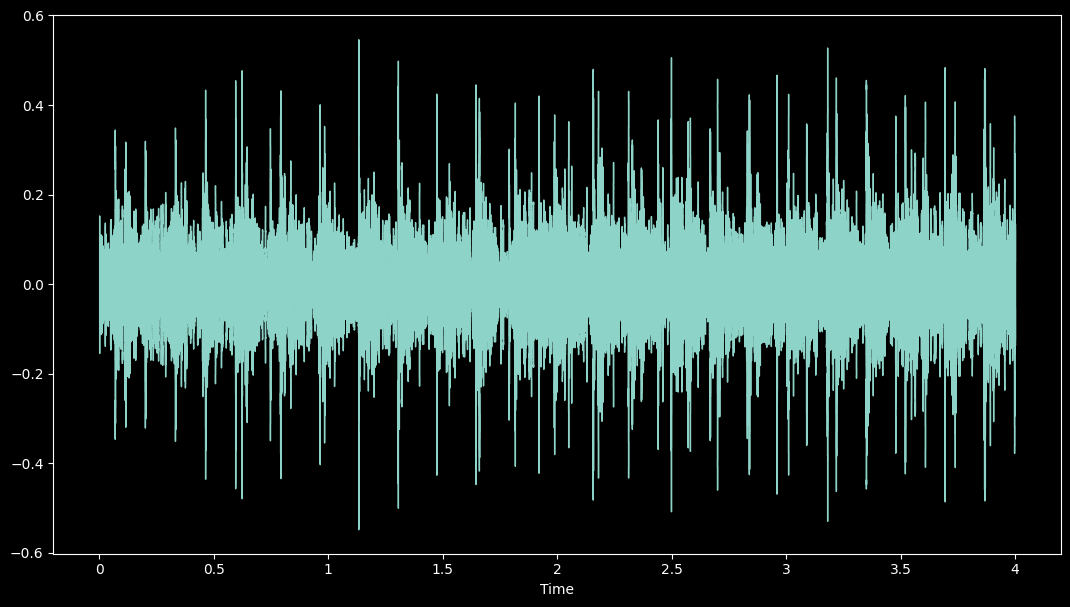

In [ ]:
waveplot_function(Main_Train_Data["WAV"][3])

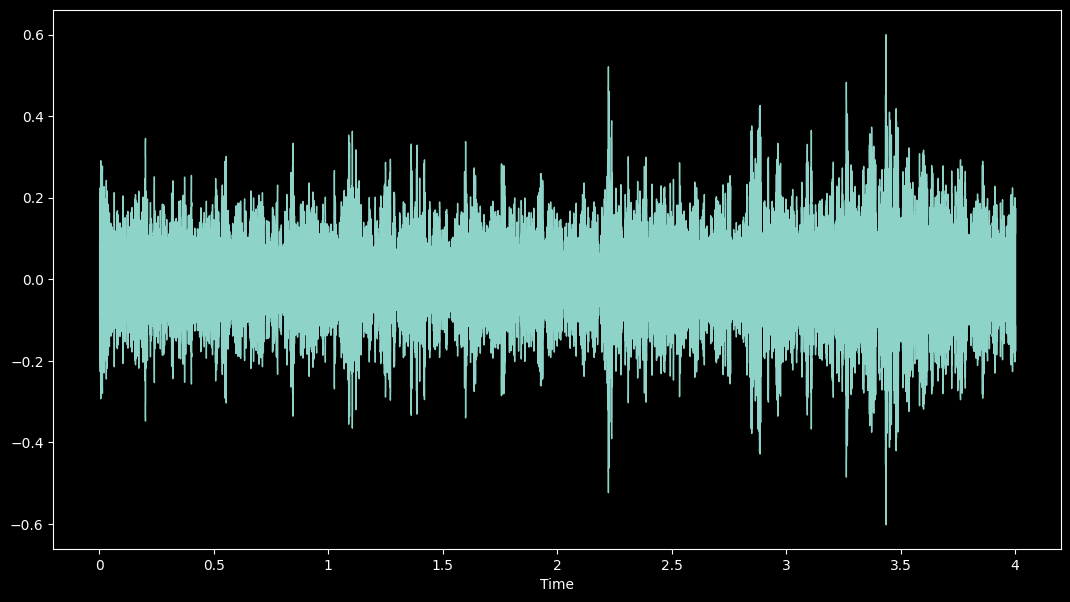

In [ ]:
waveplot_function(Main_Train_Data["WAV"][2333])

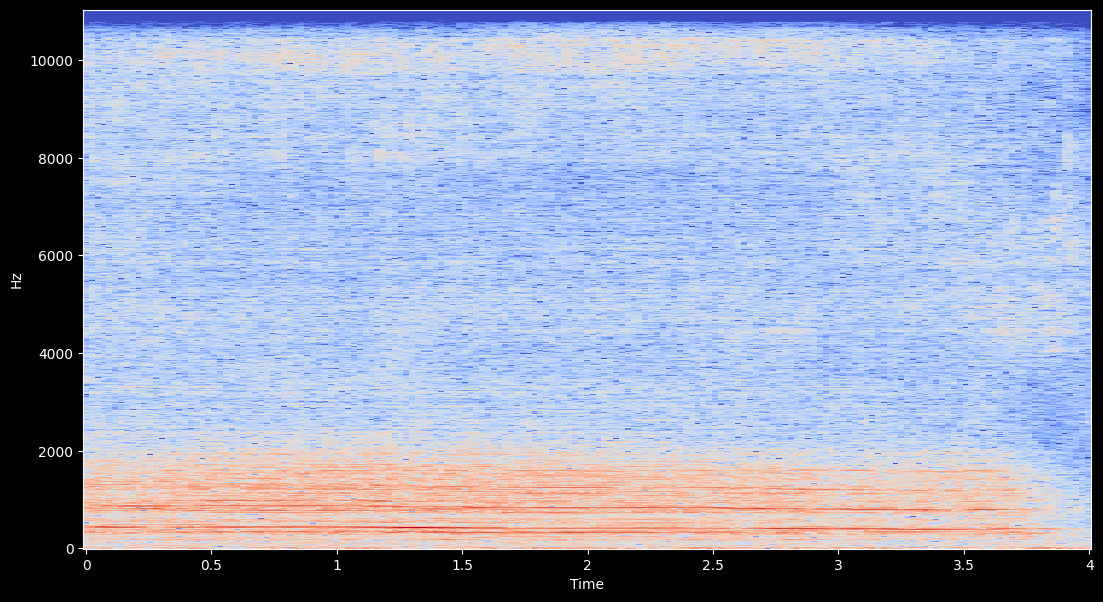

In [ ]:
specshow_function(Main_Train_Data["WAV"][2])

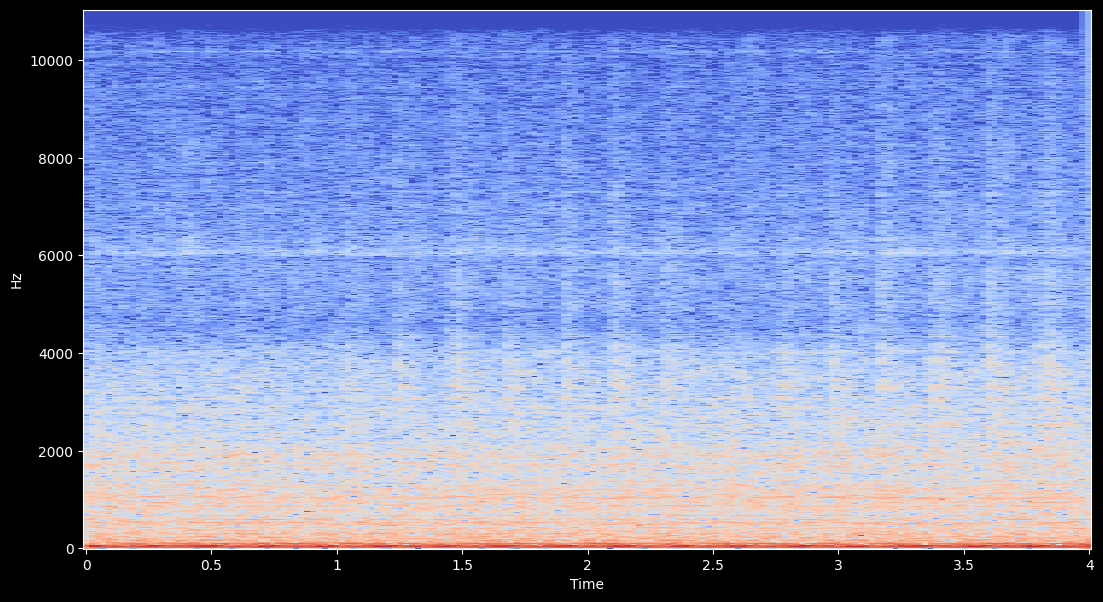

In [ ]:
specshow_function(Main_Train_Data["WAV"][2331])

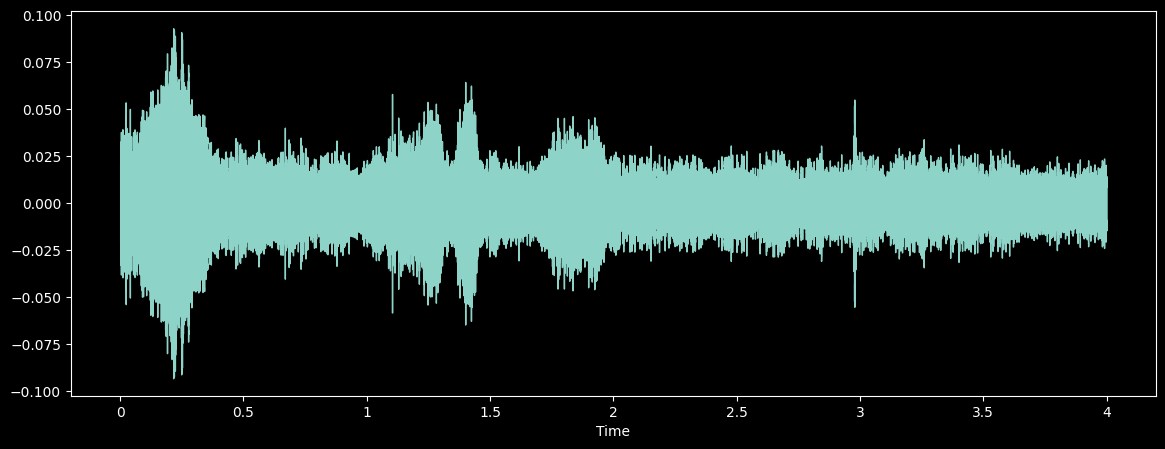

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][10])

noise_injection = noise_function(wav_type)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

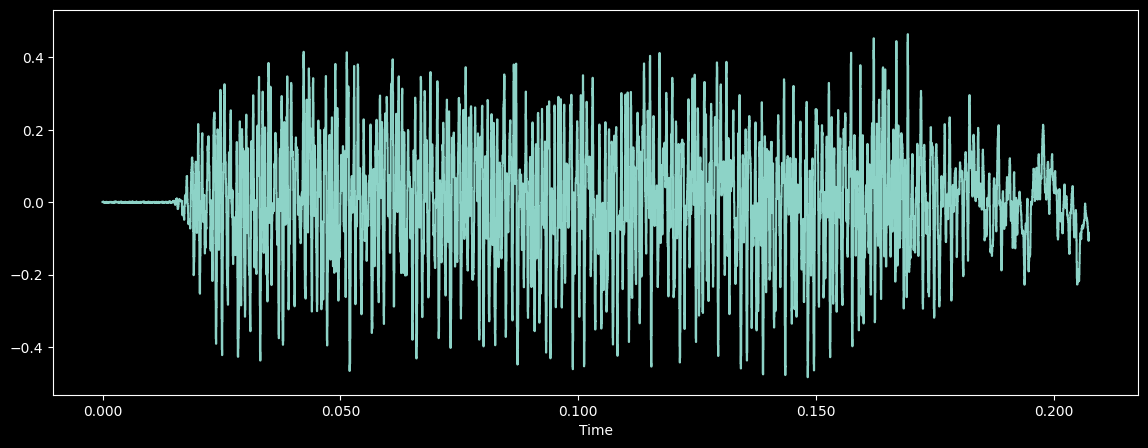

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][6020])

noise_injection = noise_function(wav_type)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

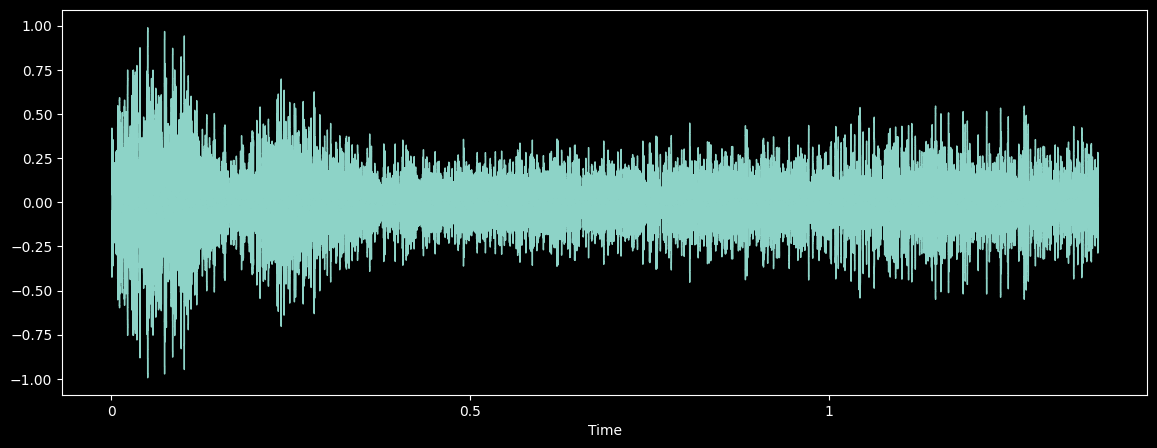

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][450])

stretch_audio = stretch_function(wav_type)
librosa.display.waveshow(stretch_audio,sr=sample_rate)
Audio(stretch_audio,rate=sample_rate)

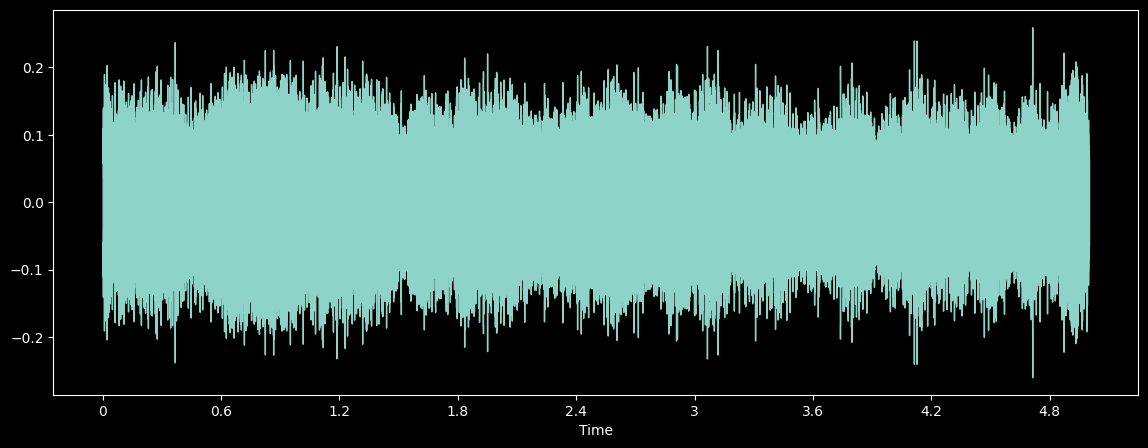

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][150])

stretch_audio = stretch_function(wav_type)
librosa.display.waveshow(stretch_audio,sr=sample_rate)
Audio(stretch_audio,rate=sample_rate)

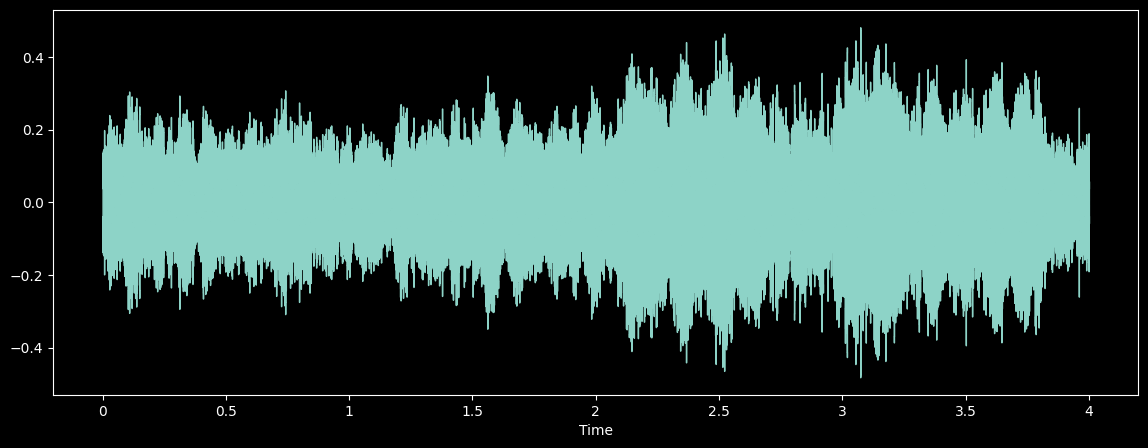

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][1544])

shift_audio = shift_function(wav_type)
librosa.display.waveshow(shift_audio,sr=sample_rate)
Audio(shift_audio,rate=sample_rate)

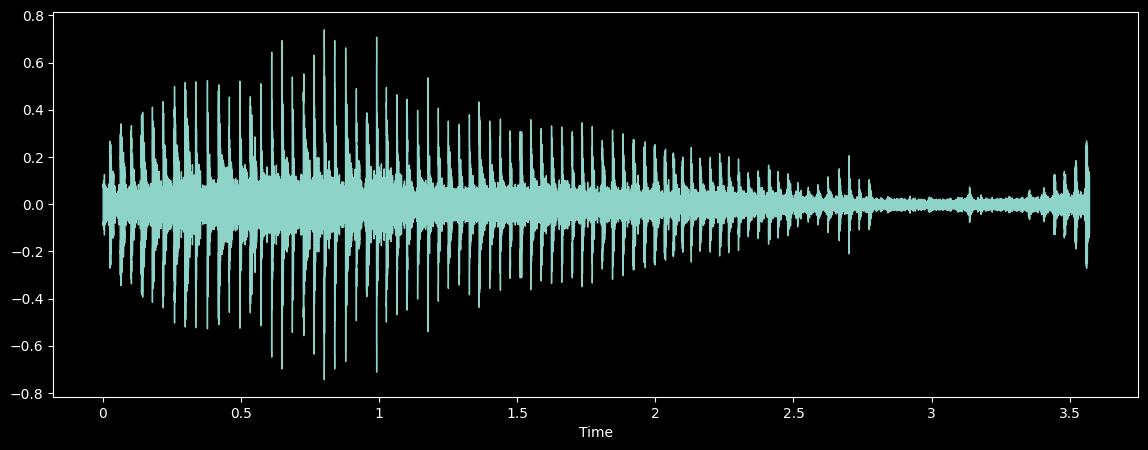

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][544])

shift_audio = shift_function(wav_type)
librosa.display.waveshow(shift_audio,sr=sample_rate)
Audio(shift_audio,rate=sample_rate)

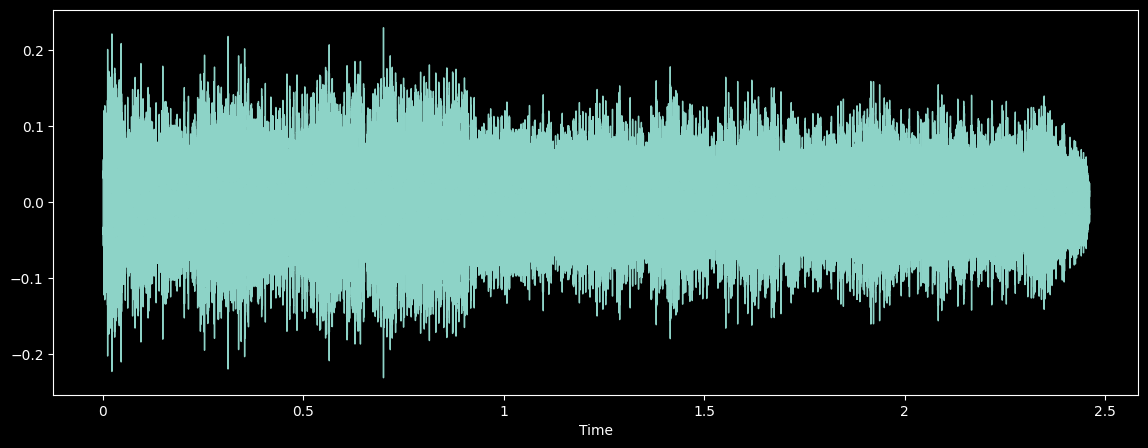

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][637])

pitch_audio = pitch_function(wav_type,sample_rate)
librosa.display.waveshow(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

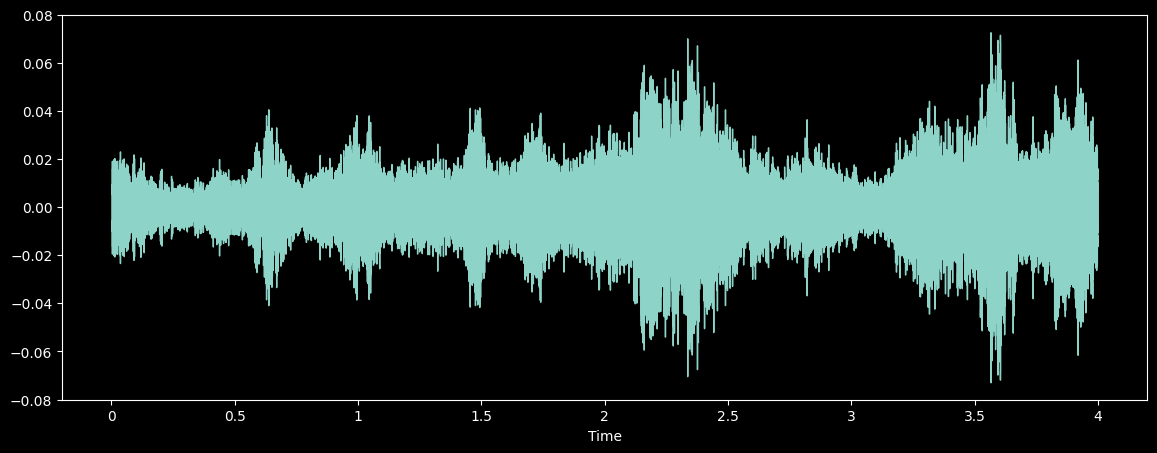

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][765])

pitch_audio = pitch_function(wav_type,sample_rate)
librosa.display.waveshow(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

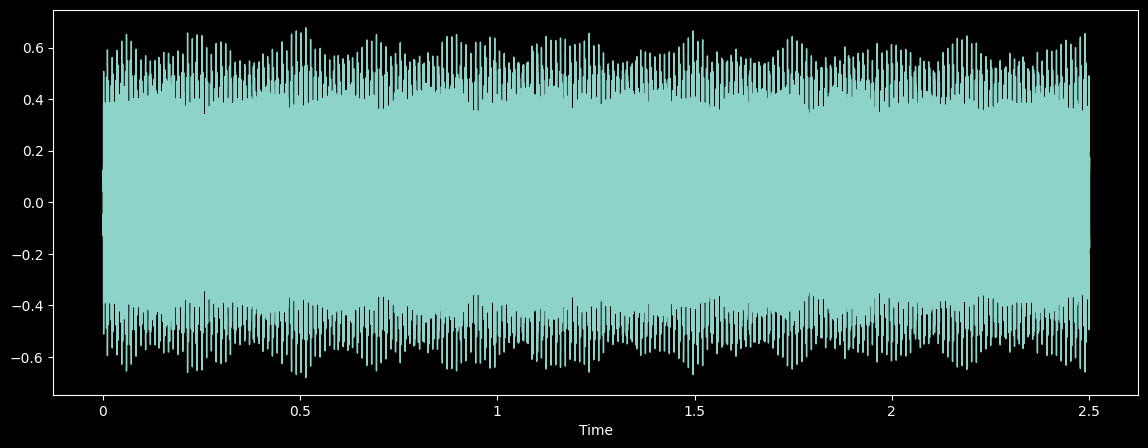

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][5],duration=2.5,offset=0.6)
librosa.display.waveshow(wav_type,sr=sample_rate)
Audio(wav_type,rate=sample_rate)

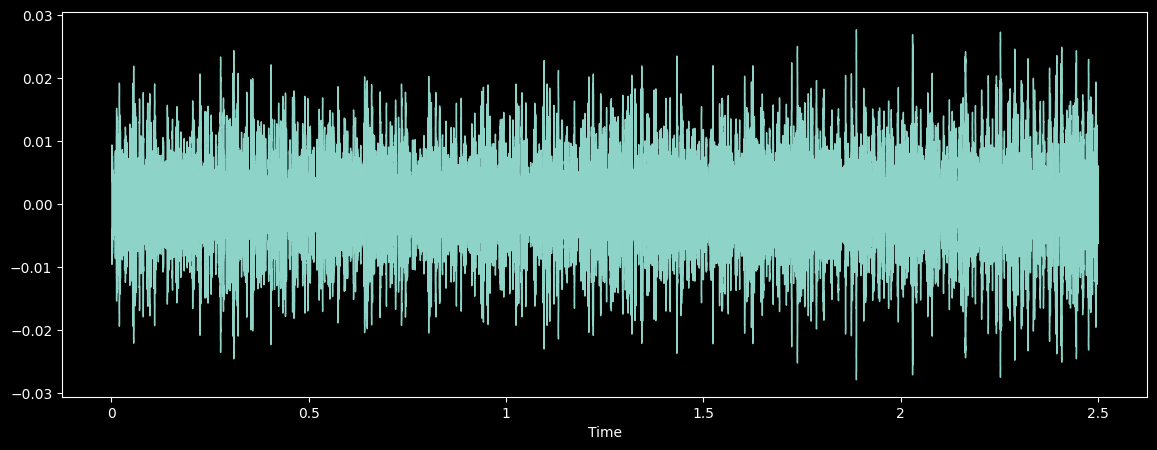

In [ ]:
figure = plt.figure(figsize=(14,5))

wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][1115],duration=2.5,offset=0.6)
librosa.display.waveshow(wav_type,sr=sample_rate)
Audio(wav_type,rate=sample_rate)

In [ ]:
wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][5],duration=2.5,offset=0.6)

print(wav_type.shape)
print(wav_type.dtype)
print(sample_rate)

(55125,)
float32
22050


In [ ]:
wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][5234],duration=2.5,offset=0.6)

print(wav_type.shape)
print(wav_type.dtype)
print(sample_rate)

(55125,)
float32
22050


In [ ]:
wav_type,sample_rate = librosa.load(Main_Train_Data["WAV"][434],duration=2.5,offset=0.6)

print(wav_type.shape)
print(wav_type.dtype)
print(sample_rate)

(31752,)
float32
22050


In [ ]:
sample_rate = 22050

In [ ]:
x_Train = []
y_Train = []


for path,category_wav in zip(Main_Train_Data.WAV,Main_Train_Data.CATEGORY):
    
    wav_features = export_function(path)
    
    for indexing in wav_features:
        x_Train.append(indexing)
        y_Train.append(category_wav)

In [ ]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["CATEGORY"] = y_Train

New_Features_Wav.to_csv("New_Wav_Features_Data.csv",index=False)

In [ ]:
New_Features_Wav.head(-1)

0         1         2         3         4         5         6  \
0      0.041759  0.510230  0.608516  0.848763  0.806499  0.688392  0.650328   
1      0.049072  0.528990  0.609541  0.846281  0.819299  0.707421  0.674362   
2      0.037001  0.601075  0.610075  0.926837  0.871997  0.715638  0.646871   
3      0.026134  0.765564  0.811482  0.888648  0.968181  0.874500  0.833941   
4      0.026134  0.765509  0.811458  0.888612  0.968223  0.874587  0.834120   
...         ...       ...       ...       ...       ...       ...       ...   
38994  0.100286  0.845569  0.837142  0.847236  0.833933  0.823674  0.848463   
38995  0.101673  0.846890  0.837841  0.848878  0.837564  0.828140  0.848763   
38996  0.128563  0.839267  0.802429  0.748569  0.770202  0.747796  0.741870   
38997  0.038585  0.848304  0.673371  0.565457  0.769158  0.625553  0.642366   
38998  0.039118  0.849320  0.675894  0.569256  0.771924  0.629110  0.645005   

              7         8         9  ...           153           154  \
0      0.551615  0.472094  0.391365  ...  3.454494e-03  2.050683e-03   
1      0.566211  0.490343  0.412649  ...  4.984123e-03  3.295504e-03   
2      0.582470  0.458093  0.405888  ...  1.219433e-03  1.282665e-03   
3      0.809396  0.770855  0.716110  ...  3.980736e-06  4.143882e-06   
4      0.809407  0.770825  0.716038  ...  3.992684e-06  4.184585e-06   
...         ...       ...       ...  ...           ...           ...   
38994  0.863385  0.862835  0.884904  ...  1.208418e-01  1.008611e-01   
38995  0.862515  0.860835  0.883393  ...  1.216677e-01  1.042815e-01   
38996  0.795795  0.833901  0.861646  ...  5.069330e-02  3.489691e-02   
38997  0.816910  0.610141  0.744142  ...  5.522505e-07  5.277424e-07   
38998  0.817370  0.611684  0.745384  ...  1.078864e-05  1.062367e-05   

                155           156           157           158           159  \
0      2.602487e-03  2.357437e-03  2.332068e-03  2.440430e-03  2.465395e-03   
1      3.915457e-03  3.617569e-03  3.879652e-03  3.741244e-03  3.564809e-03   
2      8.006023e-04  8.664127e-04  7.086441e-04  7.380802e-04  7.063728e-04   
3      3.064292e-06  2.801768e-06  2.772429e-06  2.781134e-06  2.275222e-06   
4      3.102841e-06  2.816577e-06  2.801169e-06  2.818217e-06  2.331274e-06   
...             ...           ...           ...           ...           ...   
38994  1.207446e-01  1.351678e-01  1.721268e-01  1.355558e-01  1.127423e-01   
38995  1.245811e-01  1.378552e-01  1.776408e-01  1.395119e-01  1.160254e-01   
38996  3.271261e-02  3.619145e-02  4.246650e-02  6.188705e-02  3.469797e-02   
38997  5.583680e-07  5.365620e-07  5.735426e-07  6.151503e-07  6.620829e-07   
38998  9.719692e-06  9.492148e-06  1.005913e-05  9.728720e-06  1.018298e-05   

                160           161       CATEGORY  
0      1.461055e-03  1.192568e-04   street_music  
1      2.809897e-03  1.542880e-03   street_music  
2      5.212206e-04  2.531034e-05   street_music  
3      1.336259e-06  2.298059e-07  engine_idling  
4      1.368973e-06  2.631136e-07  engine_idling  
...             ...           ...            ...  
38994  4.607619e-02  4.035808e-03       gun_shot  
38995  4.974943e-02  6.784803e-03       gun_shot  
38996  2.020954e-02  1.395887e-03       gun_shot  
38997  5.811129e-07  4.382195e-07       car_horn  
38998  1.013472e-05  9.932260e-06       car_horn  

[38999 rows x 163 columns]

In [ ]:
print(New_Features_Wav["CATEGORY"].value_counts())

street_music        3900
engine_idling       3900
drilling            3900
jackhammer          3900
dog_bark            3900
car_horn            3900
gun_shot            3900
children_playing    3900
siren               3900
air_conditioner     3900
Name: CATEGORY, dtype: int64


In [ ]:
OHE_Function = OneHotEncoder()

In [ ]:
Scaler_Function = StandardScaler()

In [ ]:
Part_X = New_Features_Wav.iloc[:,:-1].values
Part_Y = New_Features_Wav["CATEGORY"].values

In [ ]:
print(Part_X.shape)
print(Part_Y.shape)

(39000, 162)
(39000,)


In [ ]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(Part_Y).reshape(-1,1)).toarray()

In [ ]:
print(Part_Y_Encode.shape)

(39000, 10)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Part_X, Part_Y_Encode, train_size=0.75, random_state = 42, shuffle=True)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(29250, 162)
(29250, 10)
(9750, 162)
(9750, 10)


In [ ]:
X_train = Scaler_Function.fit_transform(X_train)
X_test = Scaler_Function.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(29250, 162)
(9750, 162)


In [ ]:
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(29250, 162, 1)
(9750, 162, 1)


In [ ]:
output_labels = 10
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = "adam"

In [ ]:
Model_Conv1D = Sequential()
#
Model_Conv1D.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=(X_train.shape[1],1)))
Model_Conv1D.add(BatchNormalization())
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))
#
Model_Conv1D.add(Conv1D(256,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.3))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))


Model_Conv1D.add(Conv1D(128,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.3))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))


Model_Conv1D.add(Conv1D(64,5,strides=1,padding="same",activation="relu"))
Model_Conv1D.add(Dropout(0.3))
Model_Conv1D.add(MaxPooling1D(3,strides=2,padding="same"))
#
Model_Conv1D.add(Flatten())
Model_Conv1D.add(Dense(units=1024, activation='relu'))
Model_Conv1D.add(Dropout(0.3))
#
Model_Conv1D.add(Dense(units=output_labels, activation='softmax'))

In [ ]:
print(Model_Conv1D.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 batch_normalization (BatchN  (None, 162, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 dropout (Dropout)           (None, 81, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)         

In [ ]:
Model_Conv1D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
Conv1D_Model = Model_Conv1D.fit(X_train, Y_train, batch_size=64, epochs=50,
                                validation_data=(X_test, Y_test))

Epoch 1/50
458/458 [==============================] - 20s 13ms/step - loss: 1.4003 - accuracy: 0.5212 - val_loss: 1.5517 - val_accuracy: 0.6661
Epoch 2/50
458/458 [==============================] - 6s 13ms/step - loss: 0.9429 - accuracy: 0.6787 - val_loss: 0.8401 - val_accuracy: 0.7642
Epoch 3/50
458/458 [==============================] - 6s 12ms/step - loss: 0.7724 - accuracy: 0.7397 - val_loss: 0.7331 - val_accuracy: 0.7971
Epoch 4/50
458/458 [==============================] - 6s 14ms/step - loss: 0.7094 - accuracy: 0.7644 - val_loss: 0.5795 - val_accuracy: 0.8445
Epoch 5/50
458/458 [==============================] - 6s 12ms/step - loss: 0.6020 - accuracy: 0.7968 - val_loss: 0.5639 - val_accuracy: 0.8583
Epoch 6/50
458/458 [==============================] - 6s 14ms/step - loss: 0.5356 - accuracy: 0.8215 - val_loss: 0.5909 - val_accuracy: 0.8422
Epoch 7/50
458/458 [==============================] - 6s 12ms/step - loss: 0.4810 - accuracy: 0.8397 - val_loss: 0.5302 - val_accuracy: 0.880

In [ ]:
plt.style.use("dark_background")

<Axes: >

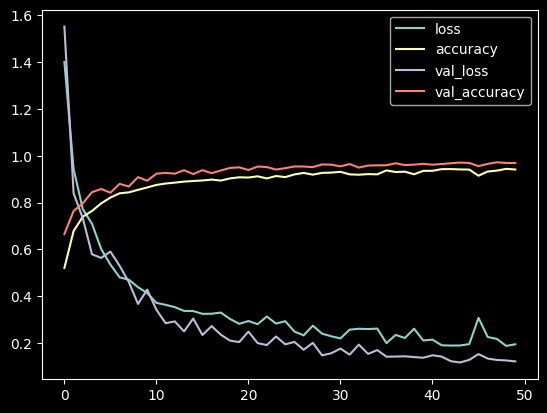

In [ ]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
Grap_Data.plot()

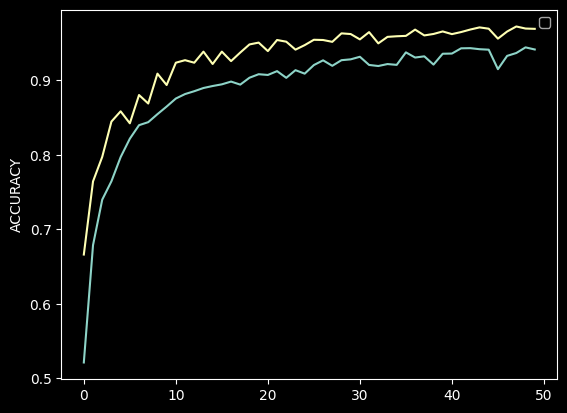

In [ ]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

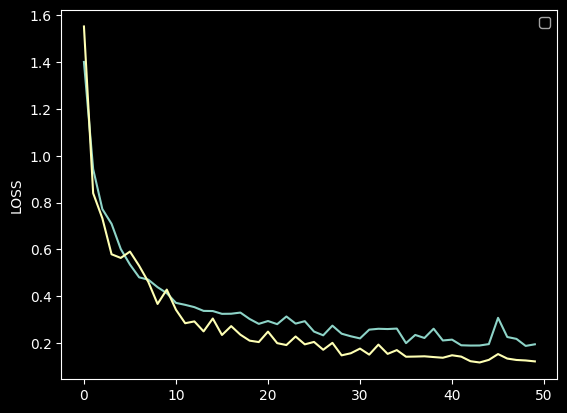

In [ ]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
Model_Results = Model_Conv1D.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])
prediction_test_Conv1D1 = Model_Conv1D.predict(X_test)
prediction_test_Conv1D_Arg1 = np.argmax(prediction_test_Conv1D1,axis=1)
print(prediction_test_Conv1D_Arg1)
Part_Y_Encode = OHE_Function.fit_transform(np.array(Y_test).reshape(-1,1)).toarray()
prediction_test_Conv1D1.shape
y_prediction_Conv1D1 = OHE_Function.inverse_transform(Y_test)
y_prediction_Conv1D1

305/305 [==============================] - 2s 6ms/step - loss: 0.1223 - accuracy: 0.9689
LOSS:  0.1223
ACCURACY:  0.9689
305/305 [==============================] - 2s 5ms/step
[1 9 4 ... 9 1 2]


ValueError: ignored

In [ ]:
prediction_test = Model_Conv1D.predict(X_test)
y_prediction = OHE_Function.inverse_transform(prediction_test)

yTest = OHE_Function.inverse_transform(Y_test)

305/305 [==============================] - 1s 3ms/step


In [ ]:
print(prediction_test[0:5])
print("---"*20)
print(y_prediction[0:5])
print("---"*20)
print(yTest[0:5])

[[8.1075029e-20 1.0000000e+00 1.8386874e-20 8.4013725e-15 6.0445158e-17
  4.3153463e-22 6.7153102e-27 5.3094350e-18 5.4179684e-21 6.8187052e-16]
 [1.9545734e-03 5.4129842e-04 8.7722385e-04 2.0807664e-04 9.6335466e-04
  1.1082778e-05 4.0671242e-05 1.2694640e-04 4.7170921e-05 9.9522960e-01]
 [9.7743354e-17 7.8231387e-15 1.6218286e-14 1.1244788e-06 9.9999893e-01
  7.9542733e-17 4.4198614e-10 1.1136195e-11 3.7853940e-13 1.1653241e-14]
 [1.7017577e-05 1.7724625e-03 6.3940263e-03 6.8426407e-03 2.8264427e-03
  1.6197762e-05 1.7146658e-06 1.7021326e-07 2.0062203e-05 9.8210931e-01]
 [4.1707265e-13 1.9113847e-10 1.8246574e-03 9.9817073e-01 3.6106584e-07
  4.1858253e-11 7.1907558e-10 2.1087746e-19 2.5268037e-06 1.8063332e-06]]
------------------------------------------------------------
[['car_horn']
 ['street_music']
 ['drilling']
 ['street_music']
 ['dog_bark']]
------------------------------------------------------------
[['car_horn']
 ['street_music']
 ['drilling']
 ['street_music']
 ['dog_ba

In [ ]:
conf_matrix = confusion_matrix(yTest, y_prediction)
acc_score = accuracy_score(yTest, y_prediction)
class_report = classification_report(yTest, y_prediction)

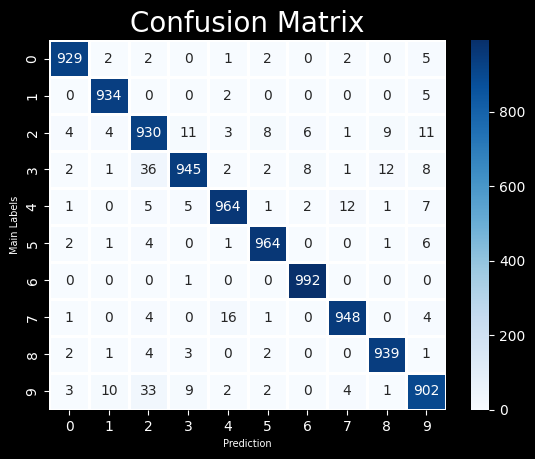

In [ ]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Prediction', size=7)
plt.ylabel('Main Labels', size=7)
plt.show()

In [ ]:
print(acc_score)
print("---"*20)
print(class_report)

0.9689230769230769
------------------------------------------------------------
                  precision    recall  f1-score   support

 air_conditioner       0.98      0.99      0.98       943
        car_horn       0.98      0.99      0.99       941
children_playing       0.91      0.94      0.93       987
        dog_bark       0.97      0.93      0.95      1017
        drilling       0.97      0.97      0.97       998
   engine_idling       0.98      0.98      0.98       979
        gun_shot       0.98      1.00      0.99       993
      jackhammer       0.98      0.97      0.98       974
           siren       0.98      0.99      0.98       952
    street_music       0.95      0.93      0.94       966

        accuracy                           0.97      9750
       macro avg       0.97      0.97      0.97      9750
    weighted avg       0.97      0.97      0.97      9750



In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(Part_X, Part_Y_Encode, train_size=0.75, random_state = 42, shuffle=True)

In [ ]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(29250, 162)
(29250, 10)
(9750, 162)
(9750, 10)


In [ ]:
xTrain = xTrain.reshape(xTrain.shape[0], 18, 9, 1)
xTest = xTest.reshape(xTest.shape[0], 18, 9, 1)

In [ ]:
print(xTrain.shape)
print(xTest.shape)

(29250, 18, 9, 1)
(9750, 18, 9, 1)


In [ ]:
Model_Conv2D = Sequential()
#
Model_Conv2D.add(Conv2D(64,(3, 3),padding="same",activation="relu",input_shape=(xTrain.shape[1],xTrain.shape[2],xTrain.shape[3])))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Flatten())
Model_Conv2D.add(Dense(1024, activation = "relu"))
Model_Conv2D.add(Dropout(0.5))
Model_Conv2D.add(Dense(output_labels, activation = "softmax"))

In [ ]:
Model_Conv2D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
Conv2D_Model = Model_Conv2D.fit(xTrain, yTrain, batch_size=64, epochs=50,validation_data=(xTest, yTest))

Epoch 1/50
458/458 [==============================] - 5s 7ms/step - loss: 1.9375 - accuracy: 0.3759 - val_loss: 1.3469 - val_accuracy: 0.5626
Epoch 2/50
458/458 [==============================] - 3s 7ms/step - loss: 1.3384 - accuracy: 0.5444 - val_loss: 1.0907 - val_accuracy: 0.6488
Epoch 3/50
458/458 [==============================] - 3s 6ms/step - loss: 1.1728 - accuracy: 0.6027 - val_loss: 1.0281 - val_accuracy: 0.6731
Epoch 4/50
458/458 [==============================] - 3s 6ms/step - loss: 1.1050 - accuracy: 0.6269 - val_loss: 0.8976 - val_accuracy: 0.7079
Epoch 5/50
458/458 [==============================] - 3s 6ms/step - loss: 0.9938 - accuracy: 0.6618 - val_loss: 0.8311 - val_accuracy: 0.7351
Epoch 6/50
458/458 [==============================] - 2s 5ms/step - loss: 0.8865 - accuracy: 0.6977 - val_loss: 0.7545 - val_accuracy: 0.7530
Epoch 7/50
458/458 [==============================] - 3s 6ms/step - loss: 0.8685 - accuracy: 0.7105 - val_loss: 0.6871 - val_accuracy: 0.7801
Epoch 

<Axes: >

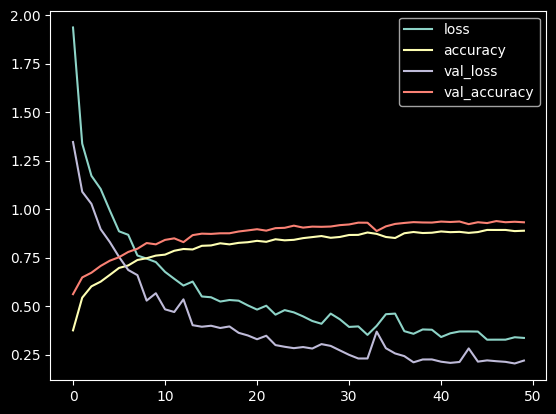

In [ ]:
Grap_Data_Conv2D = pd.DataFrame(Conv2D_Model.history)
Grap_Data_Conv2D.plot()

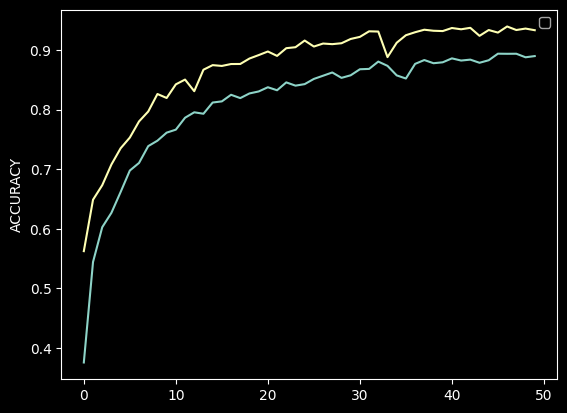

In [ ]:
plt.plot(Conv2D_Model.history["accuracy"])
plt.plot(Conv2D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

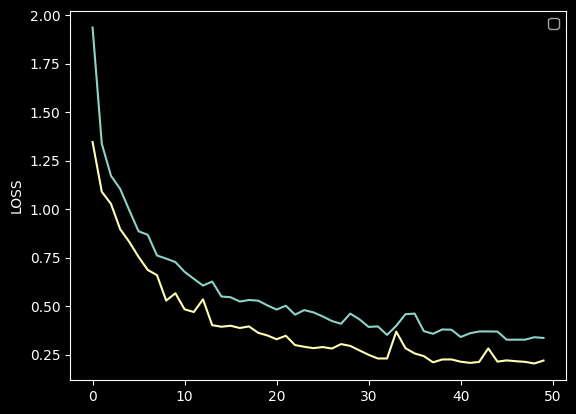

In [ ]:
plt.plot(Conv2D_Model.history["loss"])
plt.plot(Conv2D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
Model_Results_Conv2D = Model_Conv2D.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results_Conv2D[0])
print("ACCURACY:  " + "%.4f" % Model_Results_Conv2D[1])

305/305 [==============================] - 1s 4ms/step - loss: 0.2202 - accuracy: 0.9329
LOSS:  0.2202
ACCURACY:  0.9329


In [ ]:
prediction_test_Conv2D = Model_Conv2D.predict(xTest)
prediction_test_Conv2D_Arg = np.argmax(prediction_test_Conv2D,axis=1)

305/305 [==============================] - 1s 2ms/step


In [ ]:
print(prediction_test_Conv2D_Arg)

[1 9 4 ... 9 1 2]


In [ ]:
y_prediction_Conv2D = OHE_Function.inverse_transform(prediction_test_Conv2D)

NotFittedError: ignored

In [ ]:
print(y_prediction_Conv2D)

In [ ]:
import tensorflow as tf
Model_Conv1D.save('/content/drive/MyDrive/urban_traffic_model.h5')

In [ ]:
Model_Conv2D.save('/content/drive/MyDrive/urban_traffic_model_2.h5')

In [ ]:
x_Train1 = []
y_Train1 = []   
wav_features = export_function('/content/101848-9-0-1.wav')  
for indexing in wav_features:
    x_Train1.append(indexing)
    y_Train1.append('')
New_Features_Wav1 = pd.DataFrame(x_Train1)

New_Features_Wav1["CATEGORY"] = y_Train1
Part_X1 = New_Features_Wav1.iloc[:,:-1].values
OHE_Function = OneHotEncoder()
Scaler_Function = StandardScaler()
Part_X1 = Part_X1.reshape(Part_X1.shape[0], 18,9, 1)
prediction_test_Conv2D1 = Model_Conv2D.predict(Part_X1)
prediction_test_Conv2D_Arg1 = np.argmax(prediction_test_Conv2D1,axis=1)
print(prediction_test_Conv2D_Arg1)
Part_Y_Encode = OHE_Function.fit_transform(np.array(Part_Y).reshape(-1,1)).toarray()
y_prediction_Conv2D1 = OHE_Function.inverse_transform(prediction_test_Conv2D1)
y_prediction_Conv2D1


1/1 [==============================] - 0s 114ms/step
[9 9 9]


array([['street_music'],
       ['street_music'],
       ['street_music']], dtype=object)

In [ ]:
playing_function('/content/119809-7-0-5.wav')

In [ ]:
y_,_=librosa.load('/content/102857-5-0-4.wav')
Audio(y_,rate=sample_rate)

In [ ]:
New_Features_Wav1.head()

0         1         2         3         4         5         6  \
0  0.024680  0.933715  0.751296  0.627596  0.589784  0.595318  0.777484   
1  0.024680  0.933609  0.751098  0.627505  0.589859  0.595569  0.777478   
2  0.018482  0.984491  0.911000  0.709437  0.554074  0.516538  0.534530   

          7         8         9  ...       153       154       155       156  \
0  0.608125  0.561141  0.555987  ...  0.001460  0.001556  0.001151  0.001022   
1  0.608075  0.561127  0.555907  ...  0.001464  0.001557  0.001155  0.001021   
2  0.732267  0.532364  0.502851  ...  0.000487  0.000456  0.000448  0.000311   

        157       158       159       160       161  CATEGORY  
0  0.000990  0.001135  0.000863  0.000605  0.000104            
1  0.000992  0.001144  0.000869  0.000608  0.000105            
2  0.000220  0.000281  0.000318  0.000138  0.000010            

[3 rows x 163 columns]

In [ ]:
OHE_Function = OneHotEncoder()

In [ ]:
Scaler_Function = StandardScaler()

In [ ]:
print(Part_X1.shape)

(3, 18, 9, 1)


In [ ]:
Part_X1 = Part_X1.reshape(Part_X1.shape[0], 18, 9, 1)

In [ ]:
prediction_test_Conv2D1 = Model_Conv2D.predict(Part_X1)
prediction_test_Conv2D_Arg1 = np.argmax(prediction_test_Conv2D1,axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
prediction_test_Conv2D_Arg1

array([5, 5, 5])

In [ ]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(Part_Y).reshape(-1,1)).toarray()

In [ ]:
y_prediction_Conv2D1 = OHE_Function.inverse_transform(prediction_test_Conv2D1)

In [ ]:
y_prediction_Conv2D1

array([['engine_idling'],
       ['engine_idling'],
       ['engine_idling']], dtype=object)